In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
# Load the dataset
data = pd.read_csv("garments_worker_productivity.csv")

In [70]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [72]:
null_values = data.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [73]:
data.fillna(0, inplace=True)

In [74]:
threshold = 0.8
data['class_label'] = np.where(data['actual_productivity'] >= threshold, 1, 0)

# Determining the number of features for subplot layout
num_features = len(data.columns[:-2])  
num_rows = (num_features + 1) // 2  

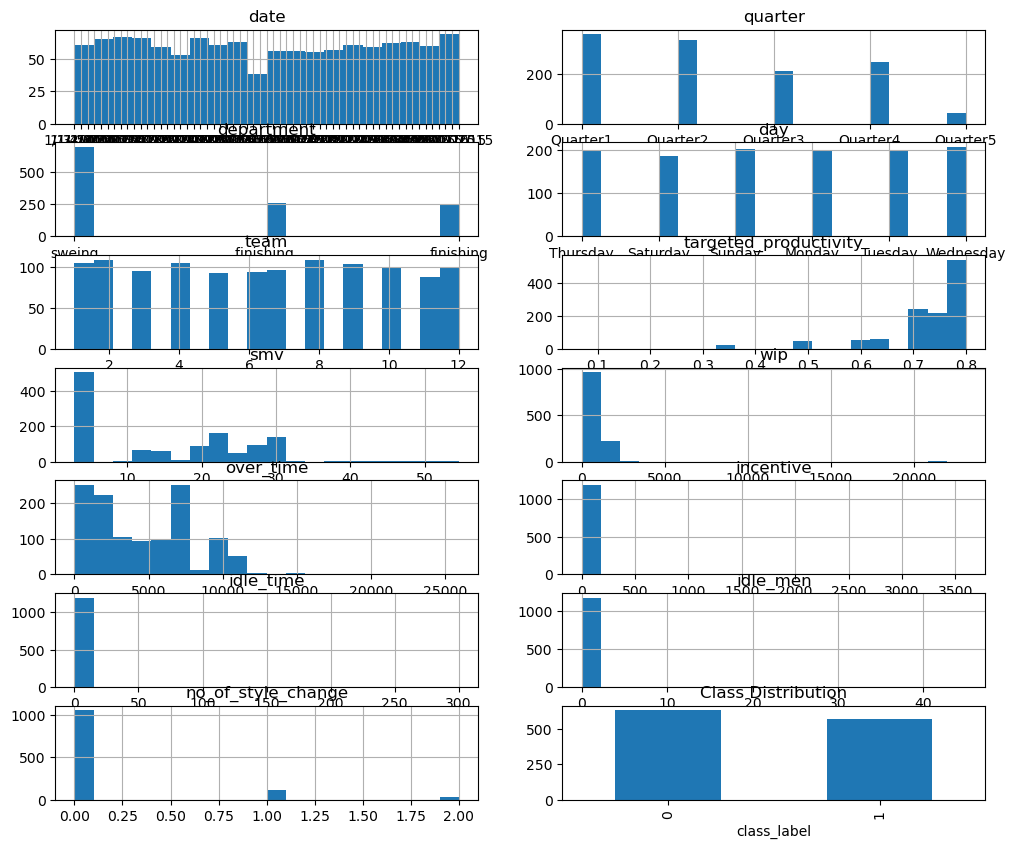

In [75]:
# Visualize the distribution of features and classes
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns[:-2]):
    plt.subplot(num_rows, 2, i + 1)
    data[column].hist(bins=20)
    plt.title(column)
plt.subplot(num_rows, 2, num_rows*2)
data['class_label'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

In [76]:
# Normalize the data
scaler = StandardScaler()
data.iloc[:, 5:-1] = scaler.fit_transform(data.iloc[:, 5:-1])

# Spliting the data into training and test sets
X = data.iloc[:, 5:-1]  # Features
y = data['class_label']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (957, 10) (957,)
Test set shape: (240, 10) (240,)


In [55]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.biases_input_hidden = np.zeros((1, self.hidden_size))
        
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.biases_hidden_output = np.zeros((1, self.output_size))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def feedforward(self, X):
        # Input layer to hidden layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.biases_input_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        
        # Hidden layer to output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.biases_hidden_output
        self.output = self.sigmoid(self.output_input)
        
        return self.output
    
    def backward(self, X, y, output, learning_rate):
        # Calculate error and delta for output layer
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)
        
        # Calculate error and delta for hidden layer
        self.hidden_error = self.output_delta.dot(self.weights_hidden_output.T)
        self.hidden_delta = self.hidden_error * self.sigmoid_derivative(self.hidden_output)
        
        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(self.output_delta) * learning_rate
        self.biases_hidden_output += np.sum(self.output_delta) * learning_rate
        
        self.weights_input_hidden += X.T.dot(self.hidden_delta) * learning_rate
        self.biases_input_hidden += np.sum(self.hidden_delta) * learning_rate
    
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, output, learning_rate)
            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}: Loss {loss}")
    
    def predict(self, X):
        return self.feedforward(X)

# Example usage
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_size = X.shape[1]
hidden_size = 20
output_size = y.shape[1]

nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(X, y, epochs=10000, learning_rate=0.1)

# Test the trained model
print("Predictions after training:")
print(nn.predict(X))

Epoch 0: Loss 0.25104396831783204
Epoch 1000: Loss 0.08518232535898855
Epoch 2000: Loss 0.025901749552235558
Epoch 3000: Loss 0.012600932239010014
Epoch 4000: Loss 0.007807136730374742
Epoch 5000: Loss 0.0054927650651037515
Epoch 6000: Loss 0.004169581205579168
Epoch 7000: Loss 0.003327192839861119
Epoch 8000: Loss 0.0027498179401020495
Epoch 9000: Loss 0.002332305432994905
Predictions after training:
[[0.04931355]
 [0.95816473]
 [0.95668532]
 [0.044871  ]]


In [67]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initializing weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.biases_input_hidden = np.zeros((1, self.hidden_size))
        
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.biases_hidden_output = np.zeros((1, self.output_size))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def feedforward(self, X):
  
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.biases_input_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        
        # Hidden layer to output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.biases_hidden_output
        self.output = self.sigmoid(self.output_input)
        
        return self.output
    
    def predict(self, X):
        return self.feedforward(X)

# Initialize neural network with appropriate input size
input_size = X_test.shape[1]  
hidden_size = 20
output_size = 1  
nn = NeuralNetwork(input_size, hidden_size, output_size)

y_pred = nn.predict(X_test)

# Converting predicted probabilities to binary predictions
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred_binary)
print("F1-score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", roc_auc)

Accuracy: 0.7708333333333334
Precision: 0.7185185185185186
Recall: 0.8508771929824561
F1-score: 0.7791164658634538
ROC-AUC: 0.866750208855472


# Developing ANN using ML Libraries

In [77]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data.fillna(0, inplace=True)

# Transforming actual_productivity to a discrete variable
threshold = 0.8
data['class_label'] = np.where(data['actual_productivity'] >= threshold, 1, 0)

# Normalize the data
scaler = StandardScaler()
data.iloc[:, 5:-1] = scaler.fit_transform(data.iloc[:, 5:-1])

# Spliting the data into training and test sets
X = data.iloc[:, 5:-1]  # Features
y = data['class_label']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construct the neural network model
mlp = MLPClassifier(hidden_layer_sizes=(20,), activation='relu', solver='adam', max_iter=1000)

# Train the neural network
mlp.fit(X_train, y_train)

# Test the neural network
y_pred = mlp.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Performance metrics for neural network classifier using scikit-learn:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Performance metrics for neural network classifier using scikit-learn:
Accuracy: 0.9875
Precision: 0.9411764705882353
Recall: 1.0
F1-score: 0.9696969696969697


# Parameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(20,), (30,), (40,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [1000, 1500, 2000]
}

# Initializing the grid search
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid, cv=3, scoring='accuracy')

# Performing grid search to find the best parameters
grid_search.fit(X_train, y_train)

# best parameters found by grid search
best_params = grid_search.best_params_
print("Best parameters found by grid search:", best_params)

# Re-train the model with the best parameters
best_mlp = MLPClassifier(**best_params)
best_mlp.fit(X_train, y_train)

# Test the re-trained model
y_pred_tuned = best_mlp.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print("\nPerformance metrics for tuned neural network classifier:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1-score:", f1_tuned)


Best parameters found by grid search: {'activation': 'relu', 'hidden_layer_sizes': (40,), 'max_iter': 1500, 'solver': 'adam'}

Performance metrics for tuned neural network classifier:
Accuracy: 0.9958333333333333
Precision: 0.9795918367346939
Recall: 1.0
F1-score: 0.9896907216494846


# Performing SVM machine learning

In [79]:
from sklearn.svm import SVC

# SVM classifier
svm_classifier = SVC()

# Training the SVM classifier
svm_classifier.fit(X_train, y_train)

# Testing the SVM classifier
y_pred_svm = svm_classifier.predict(X_test)

# Evaluating performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("Performance metrics for SVM classifier:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)


Performance metrics for SVM classifier:
Accuracy: 0.9708333333333333
Precision: 0.9555555555555556
Recall: 0.8958333333333334
F1-score: 0.924731182795699


# Comparing ANN with another SVM Model

In [81]:
print("\nComparison of performance metrics:")

print("ANN Classifier:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("\nSVM Classifier:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)



Comparison of performance metrics:
ANN Classifier:
Accuracy: 0.9875
Precision: 0.9411764705882353
Recall: 1.0
F1-score: 0.9696969696969697

SVM Classifier:
Accuracy: 0.9708333333333333
Precision: 0.9555555555555556
Recall: 0.8958333333333334
F1-score: 0.924731182795699
